In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os

/Users/esrabardakci/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df=pd.read_csv('metadata.csv') #veriyi okuyalım

/Users/esrabardakci/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (1,4,5,6,13,14,15,16) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df.head(3)

,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,mag_id,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id
0,ug7v899j,d1aafb70c066a2068b02786f8929fd9c900897fb,PMC,Clinical features of culture-proven Mycoplasma...,10.1186/1471-2334-1-6,PMC35282,11472636,no-cc,OBJECTIVE: This retrospective chart review des...,2001-07-04,"Madani, Tariq A; Al-Ghamdi, Aisha A",BMC Infect Dis,NaN,NaN,NaN,document_parses/pdf_json/d1aafb70c066a2068b027...,document_parses/pmc_json/PMC35282.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,NaN
1,02tnwd4m,6b0567729c2143a66d737eb0a2f63f2dce2e5a7d,PMC,Nitric oxide: a pro-inflammatory mediator in l...,10.1186/rr14,PMC59543,11667967,no-cc,Inflammatory diseases of the respiratory tract...,2000-08-15,"Vliet, Albert van der; Eiserich, Jason P; Cros...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/6b0567729c2143a66d737...,document_parses/pmc_json/PMC59543.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
2,ejv2xln0,06ced00a5fc04215949aa72528f2eeaae1d58927,PMC,Surfactant protein-D and pulmonary host defense,10.1186/rr19,PMC59549,11667972,no-cc,Surfactant protein-D (SP-D) participates in th...,2000-08-25,"Crouch, Erika C",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/06ced00a5fc04215949aa...,document_parses/pmc_json/PMC59549.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN


# Missing Data and Duplication  Handling

In [4]:
# Eksik veri sayısı ve oranı
missing_counts = df.isnull().sum()
missing_percentage = (missing_counts / len(df)) * 100

missing_df = pd.DataFrame({
    "Missing Count": missing_counts,
    "Missing %": missing_percentage
}).sort_values(by="Missing %", ascending=False)

print(missing_df)

                  Missing Count   Missing %
mag_id                  1056660  100.000000
arxiv_id                1042411   98.651506
pmc_json_files           740918   70.118865
pdf_json_files           682894   64.627600
sha                      682894   64.627600
pmcid                    667089   63.131849
who_covidence_id         573725   54.296084
pubmed_id                557728   52.782163
doi                      399880   37.843772
url                      369726   34.990063
abstract                 235542   22.291182
journal                   87322    8.263964
s2_id                     80192    7.589196
authors                   23869    2.258910
publish_time               1814    0.171673
title                       503    0.047603
license                       0    0.000000
source_x                      0    0.000000
cord_uid                      0    0.000000


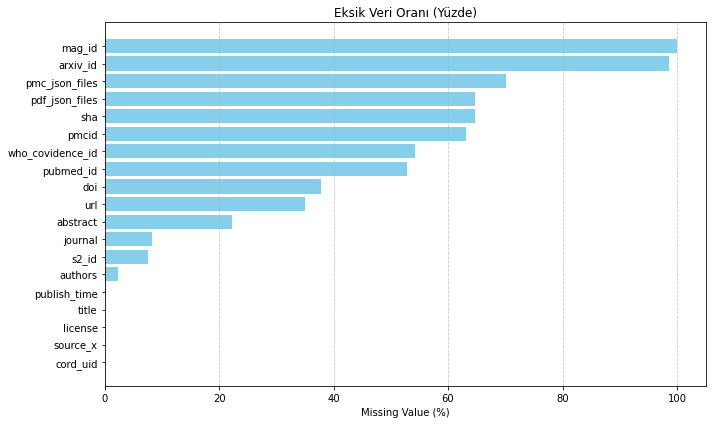

In [5]:
# Grafikle göster
plt.figure(figsize=(10, 6))
plt.barh(missing_df.index, missing_df["Missing %"], color='skyblue')
plt.xlabel("Missing Value (%)")
plt.title("Eksik Veri Oranı (Yüzde)")
plt.gca().invert_yaxis()  # En çok eksik veri olan üstte olsun
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [6]:
#clean the data that has high missing value and also redundant for the analysis
df.drop(columns=['mag_id', 'sha', 'pmcid', 
                 'pdf_json_files', 'pmc_json_files', 
                 'arxiv_id','who_covidence_id'], inplace=True)

In [7]:
#diğerleri için eksik satırları çıkaralım
df.dropna(subset=['title', 'abstract', 'publish_time'], inplace=True)

In [8]:
# Duplikasyonlara bakalım
duplicate_rows = df[df.duplicated()]
print(f"Toplam {duplicate_rows.shape[0]} tekrarlayan satır bulundu.")

Toplam 32668 tekrarlayan satır bulundu.


In [9]:
#duplikasyonları ayıklayalım
df.drop_duplicates(inplace=True)
print(f"Duplikasyonlar silindi. Yeni satır sayısı: {len(df)}")

Duplikasyonlar silindi. Yeni satır sayısı: 786616


# Let's Star the analysis

In [10]:
#Öncelikle tarih kolonu datetime formatına
df['publish_time'] = pd.to_datetime(df['publish_time'], errors='coerce')

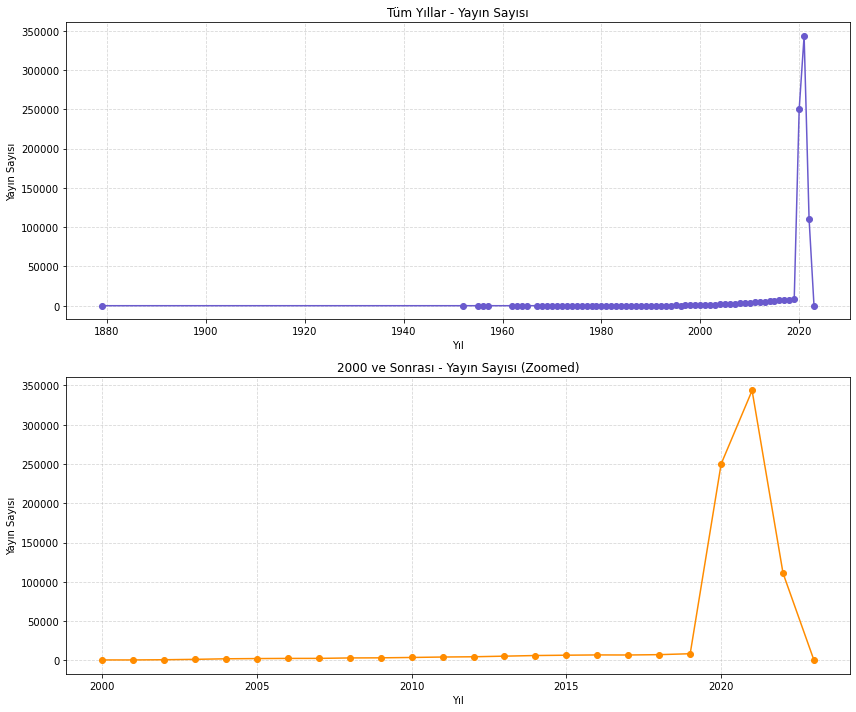

In [11]:
import matplotlib.pyplot as plt

# Yayın yılını çıkart (eğer çıkarılmadıysa)
df['year'] = df['publish_time'].dt.year

# Tüm yıllar
pubs_by_year = df['year'].value_counts().sort_index()

# 2000 ve sonrası
pubs_after_2000 = pubs_by_year[pubs_by_year.index >= 2000]

# Subplot başlat
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10), sharey=False)

# 1. grafik: tüm yıllar
axes[0].plot(pubs_by_year.index, pubs_by_year.values, marker='o', color='slateblue')
axes[0].set_title("Tüm Yıllar - Yayın Sayısı")
axes[0].set_xlabel("Yıl")
axes[0].set_ylabel("Yayın Sayısı")
axes[0].grid(True, linestyle='--', alpha=0.5)

# 2. grafik: 2000 ve sonrası zoom
axes[1].plot(pubs_after_2000.index, pubs_after_2000.values, marker='o', color='darkorange')
axes[1].set_title("2000 ve Sonrası - Yayın Sayısı (Zoomed)")
axes[1].set_xlabel("Yıl")
axes[1].set_ylabel("Yayın Sayısı")
axes[1].grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

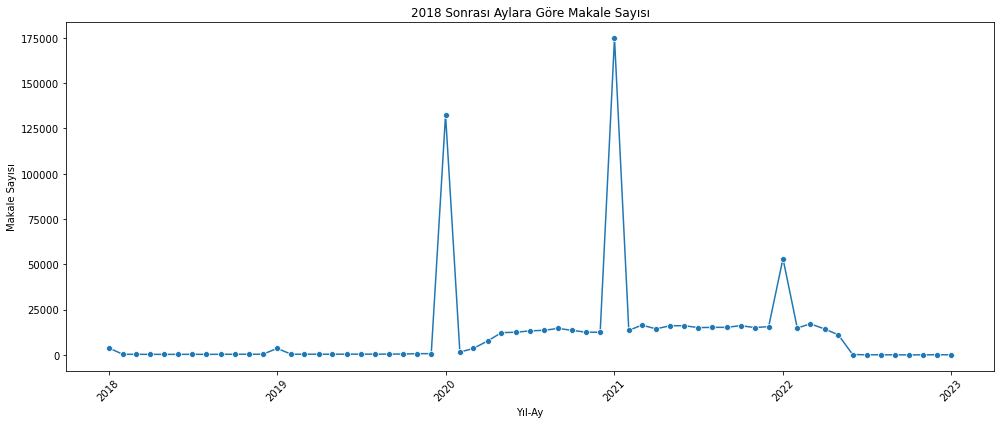

In [12]:
# 2. 2018 ve sonrası filtrele
df_filtered = df[df['publish_time'].dt.year >= 2018].copy()

# 3. Yıl-Ay bazında grupla, makale sayısını say
df_filtered['year_month'] = df_filtered['publish_time'].dt.to_period('M')
monthly_counts = df_filtered.groupby('year_month').size().reset_index(name='article_count')

# Period tipini datetime yap (grafik için)
monthly_counts['year_month'] = monthly_counts['year_month'].dt.to_timestamp()

# 4. Grafik çiz
plt.figure(figsize=(14,6))
sns.lineplot(data=monthly_counts, x='year_month', y='article_count', marker='o')
plt.title('2018 Sonrası Aylara Göre Makale Sayısı')
plt.xlabel('Yıl-Ay')
plt.ylabel('Makale Sayısı')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

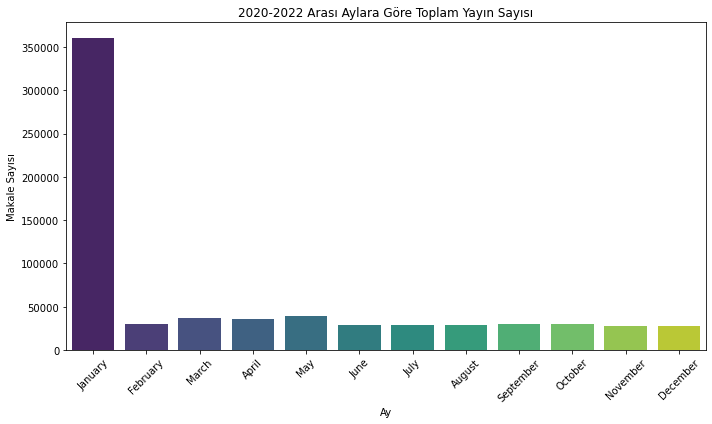

In [13]:
import calendar

# 2020-2022 arası filtre
df_filtered = df[(df['publish_time'].dt.year >= 2020) & (df['publish_time'].dt.year <= 2022)].copy()

# Ay numarasını al
df_filtered['month'] = df_filtered['publish_time'].dt.month

# Ay bazında grupla ve makale sayısını say
monthly_counts = df_filtered.groupby('month').size().reset_index(name='article_count')

# Ay isimlerini al (1=Ocak, 2=Şubat, ...)
monthly_counts['month_name'] = monthly_counts['month'].apply(lambda x: calendar.month_name[x])

# Grafik çiz
plt.figure(figsize=(10,6))
sns.barplot(data=monthly_counts, x='month_name', y='article_count', palette='viridis')
plt.title('2020-2022 Arası Aylara Göre Toplam Yayın Sayısı')
plt.xlabel('Ay')
plt.ylabel('Makale Sayısı')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


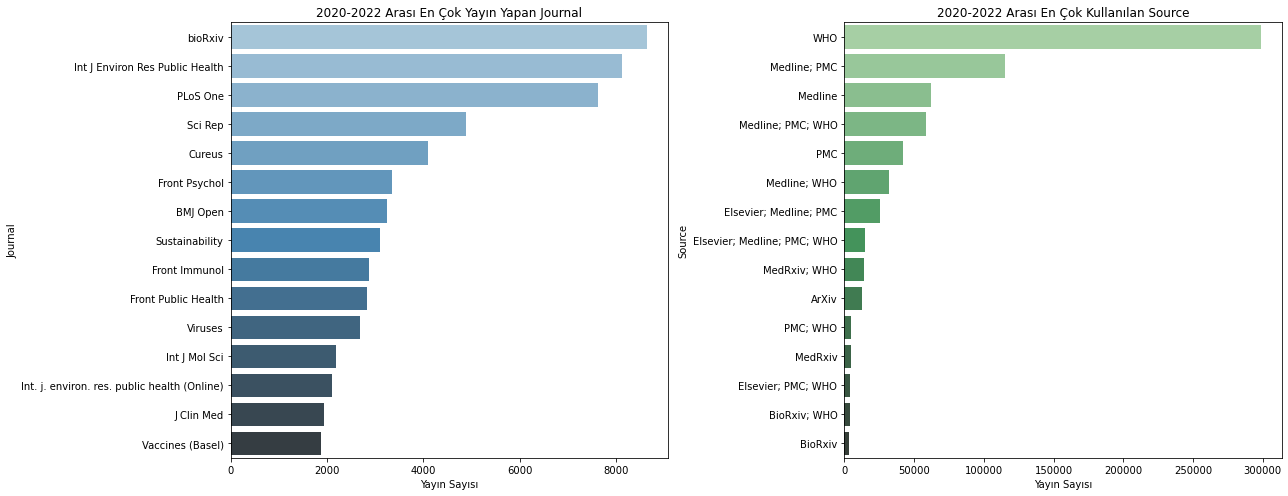

In [14]:
# 2020-2022 arası filtre
df_filtered = df[(df['publish_time'].dt.year >= 2020) & (df['publish_time'].dt.year <= 2022)].copy()

# Journal bazında sayım
journal_counts = df_filtered['journal'].value_counts().reset_index()
journal_counts.columns = ['journal', 'count']

# Source_x bazında sayım
source_counts = df_filtered['source_x'].value_counts().reset_index()
source_counts.columns = ['source_x', 'count']

# Şekil ve subplot ayarı
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Journal bar grafiği (en çok 15 tane gösterelim)
sns.barplot(data=journal_counts.head(15), y='journal', x='count', ax=axes[0], palette='Blues_d')
axes[0].set_title('2020-2022 Arası En Çok Yayın Yapan Journal')
axes[0].set_xlabel('Yayın Sayısı')
axes[0].set_ylabel('Journal')

# Source_x bar grafiği (tümünü gösterelim ya da ilk 15)
sns.barplot(data=source_counts.head(15), y='source_x', x='count', ax=axes[1], palette='Greens_d')
axes[1].set_title('2020-2022 Arası En Çok Kullanılan Source')
axes[1].set_xlabel('Yayın Sayısı')
axes[1].set_ylabel('Source')

plt.tight_layout()
plt.show()

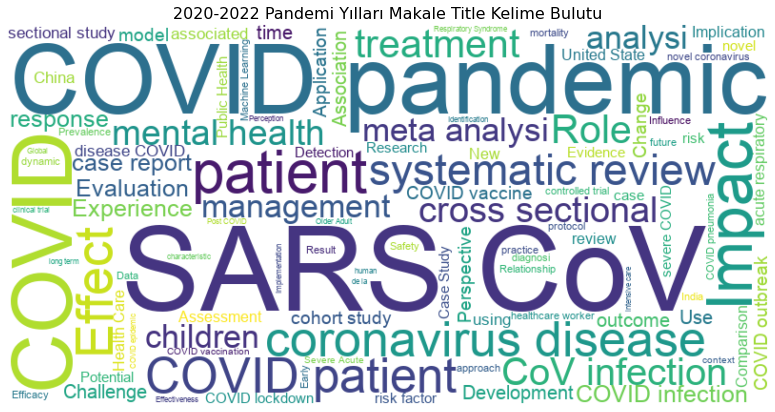

In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# MacOS sisteminde yerleşik Arial fontu kullan
font_path = "/System/Library/Fonts/Supplemental/Arial.ttf"

# 2020-2022 filtrelenmiş dataframe'den title'ları birleştir
text = " ".join(title for title in df_filtered['title'].dropna())

# WordCloud oluştur
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    max_words=100,
    colormap='viridis',
    font_path=font_path  # Hata buradan kaynaklıydı
).generate(text)

# Görselleştir
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('2020-2022 Pandemi Yılları Makale Title Kelime Bulutu', fontsize=16)
plt.show()

    Kategori  Yayın Sayısı
0   İlişkili        454306
1  İlişkisiz        250124


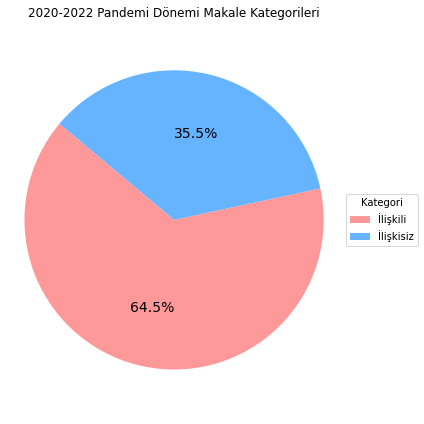

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# 1. Veri ve zaman filtresi
df['publish_time'] = pd.to_datetime(df['publish_time'], errors='coerce')
df_filtered = df[(df['publish_time'].dt.year >= 2020) & (df['publish_time'].dt.year <= 2022)].copy()

# 2. Covid ile ilişkilendirilebilecek kelimeler (büyüt-küçült duyarsız)
covid_keywords = [
    'covid', 'coronavirus', 'sars', 'pandemic', 'outbreak',
    'virus', 'vaccination', 'quarantine', 'lockdown', 'infection',
    'epidemic', 'public health', 'respiratory', 'delta', 'omicron'
]

# 3. title sütununda keyword aranacak, sonuç boolean seri olacak
def is_covid_related(title):
    if pd.isna(title):
        return False
    title_lower = title.lower()
    return any(keyword in title_lower for keyword in covid_keywords)

df_filtered['covid_related'] = df_filtered['title'].apply(is_covid_related)

# 4. Gruplandır ve say
summary = df_filtered['covid_related'].value_counts().rename(index={True: 'İlişkili', False: 'İlişkisiz'}).reset_index()
summary.columns = ['Kategori', 'Yayın Sayısı']
print(summary)

colors = ['#ff9999', '#66b3ff']

plt.figure(figsize=(6,6))
# Etiketleri kaldırıyoruz (labels=None veya boş bırakıyoruz)
wedges, texts, autotexts = plt.pie(
    summary['Yayın Sayısı'],
    labels=None,
    colors=colors,
    autopct='%1.1f%%',
    startangle=140,
    textprops={'fontsize':14}
)

plt.title('2020-2022 Pandemi Dönemi Makale Kategorileri')

# Legend ekle
plt.legend(wedges, summary['Kategori'], title="Kategori", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.axis('equal')
plt.tight_layout()
plt.show()